# Using the highest coherence number for the topics

So in each year I use it highest coherence.
I didnt use same number of topics because, topics might vary according to years.

select the number that maximizes coherence while still providing meaningful and interpretable topics

## Loading Libraries

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import random
import numpy as np
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.phrases import Phrases, Phraser
from pprint import pprint
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
# Load your DataFrame from the CSV file
df = pd.read_csv('/content/all_reviews_with_sentiments(2018-2022).csv')

## 2018

In [ ]:
# Filter rows where the 'Year' column is equal to 2018
df_2018 = df[df['Year'] == 2018]
df_2018

,Year,Data_Source,Review,sentiment_scores,sentiment_label
78,2018,Airline Rating,bwi airport diam leave class flight rep initia...,-0.9246,negative
79,2018,Airline Rating,review submit american airline facebook page b...,-0.9190,negative
80,2018,Airline Rating,suppose direct flight today phl bna right thin...,-0.9648,negative
81,2018,Airline Rating,fly piece trash airline leave strange day hurr...,-0.9623,negative
82,2018,Airline Rating,bad experience american airline cancel vacatio...,-0.9442,negative
...,...,...,...,...,...
23294,2018,Trustpilot,fine flight attendant nice seat pretty comfort...,0.9153,positive
23295,2018,Trustpilot,time fly american airline business experience ...,0.7872,positive
23296,2018,Trustpilot,instance rude service ignore ofll describe ins...,0.9674,positive
23297,2018,Trustpilot,business class ticket access complimentary pre...,0.9042,positive


In [ ]:
# convert float values to strings
df_2018['Review'] = df_2018['Review'].astype(str)

# tokenize documents
documents = [comment.split() for comment in df_2018["Review"]]

# create dictionary and corpus
vocab = corpora.Dictionary(documents)
corpus = [vocab.doc2bow(text) for text in documents]

df_2018

<ipython-input-5-6fa65b016874>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['Review'] = df_2018['Review'].astype(str)


,Year,Data_Source,Review,sentiment_scores,sentiment_label
78,2018,Airline Rating,bwi airport diam leave class flight rep initia...,-0.9246,negative
79,2018,Airline Rating,review submit american airline facebook page b...,-0.9190,negative
80,2018,Airline Rating,suppose direct flight today phl bna right thin...,-0.9648,negative
81,2018,Airline Rating,fly piece trash airline leave strange day hurr...,-0.9623,negative
82,2018,Airline Rating,bad experience american airline cancel vacatio...,-0.9442,negative
...,...,...,...,...,...
23294,2018,Trustpilot,fine flight attendant nice seat pretty comfort...,0.9153,positive
23295,2018,Trustpilot,time fly american airline business experience ...,0.7872,positive
23296,2018,Trustpilot,instance rude service ignore ofll describe ins...,0.9674,positive
23297,2018,Trustpilot,business class ticket access complimentary pre...,0.9042,positive


In [ ]:
# set hyperparameters
num_topics = 6
alpha = 0.1  # Hyperparameter for document-topic distribution
eta = 0.01  # hyperparameter for topic-word distribution, determined automatically by Gensim

# Set the random seed
np.random.seed(1)

# create LDA model with hyperparameters
lda = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                      id2word=vocab,
                                      num_topics=num_topics,
                                      alpha=alpha,
                                      eta=eta)

# print the top 10 words in each topic
pprint(lda.show_topics(num_topics=10, num_words=10))

[(0,
  '0.050*"flight" + 0.033*"airline" + 0.032*"fly" + 0.026*"american" + '
  '0.014*"time" + 0.014*"seat" + 0.014*"delay" + 0.011*"plane" + 0.009*"hour" '
  '+ 0.009*"service"'),
 (1,
  '0.036*"flight" + 0.031*"plane" + 0.018*"bag" + 0.015*"time" + 0.015*"check" '
  '+ 0.014*"airline" + 0.013*"gate" + 0.013*"arrive" + 0.011*"american" + '
  '0.011*"crew"'),
 (2,
  '0.074*"flight" + 0.027*"delay" + 0.025*"hour" + 0.020*"time" + '
  '0.013*"airline" + 0.011*"plane" + 0.011*"cancel" + 0.010*"airport" + '
  '0.010*"american" + 0.010*"leave"'),
 (3,
  '0.053*"flight" + 0.034*"seat" + 0.025*"good" + 0.021*"time" + '
  '0.018*"american" + 0.018*"service" + 0.017*"fly" + 0.016*"airline" + '
  '0.013*"great" + 0.010*"attendant"'),
 (4,
  '0.046*"flight" + 0.029*"airline" + 0.029*"american" + 0.014*"gate" + '
  '0.012*"customer" + 0.012*"fly" + 0.011*"service" + 0.011*"airport" + '
  '0.010*"change" + 0.010*"travel"'),
 (5,
  '0.067*"flight" + 0.016*"seat" + 0.015*"check" + 0.014*"time" + 0.0

In [ ]:
# Calculate coherence score for
coherence_model = CoherenceModel(model=lda, texts=documents, dictionary=vocab, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("Coherence Score for:", coherence_score)

Coherence Score for: 0.4413904760772441


In [ ]:
df_2018.head()

,Year,Data_Source,Review,sentiment_scores,sentiment_label
78,2018,Airline Rating,bwi airport diam leave class flight rep initia...,-0.9246,negative
79,2018,Airline Rating,review submit american airline facebook page b...,-0.9190,negative
80,2018,Airline Rating,suppose direct flight today phl bna right thin...,-0.9648,negative
81,2018,Airline Rating,fly piece trash airline leave strange day hurr...,-0.9623,negative
82,2018,Airline Rating,bad experience american airline cancel vacatio...,-0.9442,negative


In [ ]:
# create a new column in the DataFrame with the topic assigned to each document
# define a function to get the topic with the highest probability in a document
def get_document_topic(doc_bow):
    topics = lda.get_document_topics(doc_bow, minimum_probability=0.0)
    topics_sorted = sorted(topics, key=lambda x: x[1], reverse=True)
    return topics_sorted[0][0]

# create a new column 'Topic' in the DataFrame with the topic assigned to each document
df_2018['Topic'] = [get_document_topic(doc_bow) for doc_bow in corpus]

# Print the DataFrame with the 'Topic' column
df_2018.head()

<ipython-input-9-7792380fc6df>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['Topic'] = [get_document_topic(doc_bow) for doc_bow in corpus]


,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic
78,2018,Airline Rating,bwi airport diam leave class flight rep initia...,-0.9246,negative,4
79,2018,Airline Rating,review submit american airline facebook page b...,-0.9190,negative,0
80,2018,Airline Rating,suppose direct flight today phl bna right thin...,-0.9648,negative,2
81,2018,Airline Rating,fly piece trash airline leave strange day hurr...,-0.9623,negative,2
82,2018,Airline Rating,bad experience american airline cancel vacatio...,-0.9442,negative,0


change topic numbers to names

In [ ]:
# Define a mapping between numeric values and corresponding topics
topic_mapping = {
    0: 'Impact Of Service Delays',
    1: 'Baggage Handling Check-in Processes',
    2: 'Plane Take-off Delays',
    3: 'In-flight Seat Comfort',
    4: 'Off-Board Attendants',
    5: 'Efficient Baggage handling'
}

# Apply the mapping on the existing 'Topic' column
df_2018['Topic'] = df_2018['Topic'].replace(topic_mapping)

# Print the DataFrame with the 'Topic' column renamed to topic names
df_2018.head()


<ipython-input-10-caa810eab294>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['Topic'] = df_2018['Topic'].replace(topic_mapping)


,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic
78,2018,Airline Rating,bwi airport diam leave class flight rep initia...,-0.9246,negative,Off-Board Attendants
79,2018,Airline Rating,review submit american airline facebook page b...,-0.9190,negative,Impact Of Service Delays
80,2018,Airline Rating,suppose direct flight today phl bna right thin...,-0.9648,negative,Plane Take-off Delays
81,2018,Airline Rating,fly piece trash airline leave strange day hurr...,-0.9623,negative,Plane Take-off Delays
82,2018,Airline Rating,bad experience american airline cancel vacatio...,-0.9442,negative,Impact Of Service Delays


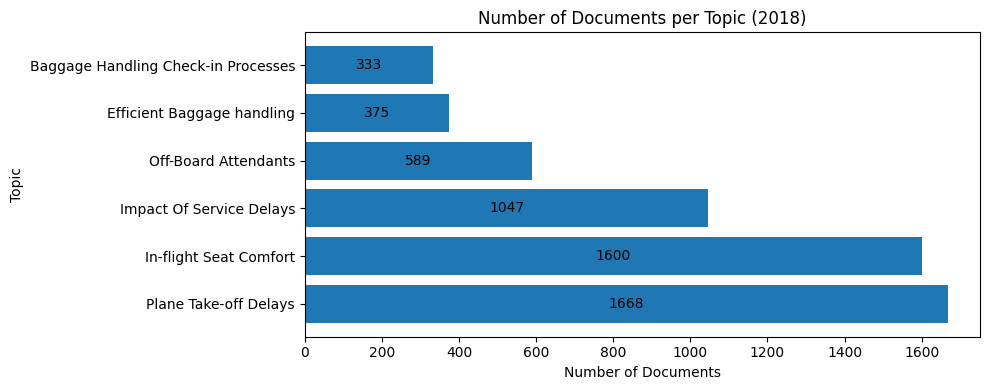

In [ ]:
# Count the occurrences of each topic in the 'Topic' column
topic_counts = df_2018['Topic'].value_counts()

# Create a bar chart to visualize the topics and the number of documents assigned to each topic
plt.figure(figsize=(10, 4))  # Adjust the figure size according to your preference
bars = plt.barh(topic_counts.index, topic_counts.values)
plt.ylabel('Topic')
plt.xlabel('Number of Documents')
plt.title('Number of Documents per Topic (2018)')

# Add counts of documents in the middle of the bars
for bar, count in zip(bars, topic_counts.values):
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, str(count), ha='center', va='center')

plt.tight_layout()  # To prevent overlapping labels
plt.show()



Average Sentiment Score for Each Topic (2018):
Topic
Baggage Handling Check-in Processes    0.330569
Efficient Baggage handling             0.223473
Impact Of Service Delays               0.022664
In-flight Seat Comfort                 0.613913
Off-Board Attendants                  -0.032151
Plane Take-off Delays                 -0.321260
Name: sentiment_scores, dtype: float64


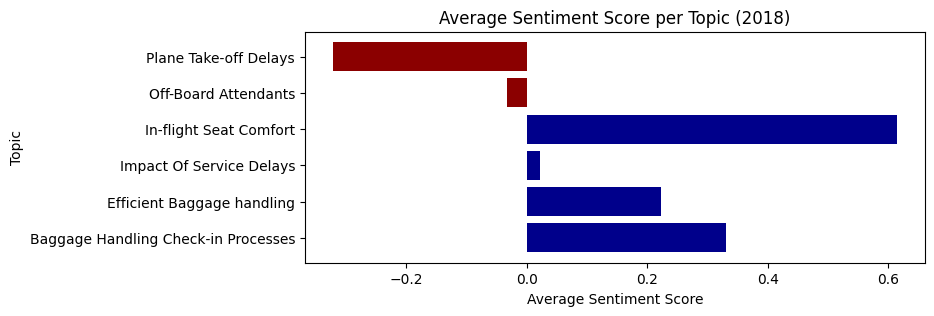

In [ ]:
# Group by 'Topic' and calculate the average sentiment score for each topic
topic_sentiment = df_2018.groupby('Topic')['sentiment_scores'].mean()

# Print the average sentiment score for each topic
print("Average Sentiment Score for Each Topic (2018):")
print(topic_sentiment)

import numpy as np

# Create a bar chart to visualize the average sentiment score for each topic
plt.figure(figsize=(8, 3))

# Define colors based on sentiment scores
colors = ['darkred' if score < 0 else 'darkblue' for score in topic_sentiment.values]

plt.barh(topic_sentiment.index, topic_sentiment.values, color=colors)  # Use barh for horizontal bars
plt.xlabel('Average Sentiment Score')  # Swap x-axis and y-axis labels
plt.ylabel('Topic')  # Swap x-axis and y-axis labels
plt.title('Average Sentiment Score per Topic (2018)')

plt.show()



In [ ]:
# Create a dictionary from the topic_sentiment Series
topic_sentiment_dict = topic_sentiment.to_dict()

# Map the average sentiment scores to the 'Topic' column in the original DataFrame
df_2018['Topic_Sentiment_Score'] = df_2018['Topic'].map(topic_sentiment_dict)

df_2018

<ipython-input-13-603d99a05873>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['Topic_Sentiment_Score'] = df_2018['Topic'].map(topic_sentiment_dict)


,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic,Topic_Sentiment_Score
78,2018,Airline Rating,bwi airport diam leave class flight rep initia...,-0.9246,negative,Off-Board Attendants,-0.032151
79,2018,Airline Rating,review submit american airline facebook page b...,-0.9190,negative,Impact Of Service Delays,0.022664
80,2018,Airline Rating,suppose direct flight today phl bna right thin...,-0.9648,negative,Plane Take-off Delays,-0.321260
81,2018,Airline Rating,fly piece trash airline leave strange day hurr...,-0.9623,negative,Plane Take-off Delays,-0.321260
82,2018,Airline Rating,bad experience american airline cancel vacatio...,-0.9442,negative,Impact Of Service Delays,0.022664
...,...,...,...,...,...,...,...
23294,2018,Trustpilot,fine flight attendant nice seat pretty comfort...,0.9153,positive,In-flight Seat Comfort,0.613913
23295,2018,Trustpilot,time fly american airline business experience ...,0.7872,positive,Off-Board Attendants,-0.032151
23296,2018,Trustpilot,instance rude service ignore ofll describe ins...,0.9674,positive,Efficient Baggage handling,0.223473
23297,2018,Trustpilot,business class ticket access complimentary pre...,0.9042,positive,Off-Board Attendants,-0.032151


In [ ]:
# Assuming you have already calculated the average sentiment score for each topic and stored it in 'topic_sentiment' variable

# Function to label topics based on average sentiment score
def label_sentiment(score):
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"


# Apply the function to each topic in the DataFrame
df_2018['Topic_Sentiment'] = df_2018['Topic'].apply(lambda topic: label_sentiment(topic_sentiment[topic]))

# Print the DataFrame to verify the new column
df_2018

<ipython-input-14-462ae29a6117>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['Topic_Sentiment'] = df_2018['Topic'].apply(lambda topic: label_sentiment(topic_sentiment[topic]))


,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic,Topic_Sentiment_Score,Topic_Sentiment
78,2018,Airline Rating,bwi airport diam leave class flight rep initia...,-0.9246,negative,Off-Board Attendants,-0.032151,negative
79,2018,Airline Rating,review submit american airline facebook page b...,-0.9190,negative,Impact Of Service Delays,0.022664,positive
80,2018,Airline Rating,suppose direct flight today phl bna right thin...,-0.9648,negative,Plane Take-off Delays,-0.321260,negative
81,2018,Airline Rating,fly piece trash airline leave strange day hurr...,-0.9623,negative,Plane Take-off Delays,-0.321260,negative
82,2018,Airline Rating,bad experience american airline cancel vacatio...,-0.9442,negative,Impact Of Service Delays,0.022664,positive
...,...,...,...,...,...,...,...,...
23294,2018,Trustpilot,fine flight attendant nice seat pretty comfort...,0.9153,positive,In-flight Seat Comfort,0.613913,positive
23295,2018,Trustpilot,time fly american airline business experience ...,0.7872,positive,Off-Board Attendants,-0.032151,negative
23296,2018,Trustpilot,instance rude service ignore ofll describe ins...,0.9674,positive,Efficient Baggage handling,0.223473,positive
23297,2018,Trustpilot,business class ticket access complimentary pre...,0.9042,positive,Off-Board Attendants,-0.032151,negative


### Perplexity 2018
evaluating the topic model in 2018 for prediction

In [ ]:
# Split data into train and test sets
train_df, test_df = train_test_split(df_2018, test_size=0.2, random_state=42)

# Tokenize test documents
test_documents = [comment.split() for comment in test_df["Review"]]
test_corpus = [vocab.doc2bow(text) for text in test_documents]

# Calculate perplexity on the test data
total_likelihood = 0.0
total_words = 0

for doc_bow in test_corpus:
    doc_likelihood = 0.0
    doc_word_count = sum(cnt for _, cnt in doc_bow)

    for topic_id, word_count in lda.get_document_topics(doc_bow):
        word_prob = lda.get_topic_terms(topic_id, topn=None)
        topic_prob = sum(prob for _, prob in word_prob)
        doc_likelihood += word_count * topic_prob

    total_likelihood += doc_likelihood
    total_words += doc_word_count

perplexity = np.exp(-total_likelihood / total_words)
print(f"Perplexity on Test Data: {perplexity}")


Perplexity on Test Data: 0.964558986039537


## **2019**

In [ ]:
## For 2019 ##

# Filter rows where the 'Year' column is equal to 2019
df_2019 = df[df['Year'] == 2019]

# Convert float values to strings
df_2019['Review'] = df_2019['Review'].astype(str)



<ipython-input-16-a752022bf1f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Review'] = df_2019['Review'].astype(str)


In [ ]:
# Tokenize documents
documents_2019 = [comment.split() for comment in df_2019["Review"]]

# Create dictionary and corpus
vocab_2019 = corpora.Dictionary(documents_2019)
corpus_2019 = [vocab_2019.doc2bow(text) for text in documents_2019]

# set hyperparameters for 2019
num_topics_2019 = 14 ### the optimum from coherence
alpha_2019 = 0.1  # Hyperparameter for document-topic distribution
eta_2019 = 0.01  # hyperparameter for topic-word distribution, determined automatically by Gensim

# Set the random seed
np.random.seed(22)

# create LDA model with hyperparameters for 2019
lda_2019 = gensim.models.ldamodel.LdaModel(corpus=corpus_2019,
                                           id2word=vocab_2019,
                                           num_topics=num_topics_2019,
                                           alpha=alpha_2019,
                                           eta=eta_2019)

# print the top 10 words in each topic for 2019
pprint(lda_2019.show_topics(num_topics=num_topics_2019, num_words=10))


[(0,
  '0.047*"flight" + 0.023*"service" + 0.023*"customer" + 0.022*"airline" + '
  '0.015*"fly" + 0.013*"american" + 0.011*"attendant" + 0.010*"rude" + '
  '0.009*"class" + 0.009*"time"'),
 (1,
  '0.094*"flight" + 0.022*"hour" + 0.020*"delay" + 0.020*"time" + '
  '0.018*"cancel" + 0.018*"plane" + 0.015*"american" + 0.014*"airline" + '
  '0.012*"fly" + 0.010*"miss"'),
 (2,
  '0.033*"plane" + 0.024*"age" + 0.023*"week" + 0.019*"dublin" + 0.019*"know" '
  '+ 0.018*"flight" + 0.017*"small" + 0.017*"coast" + 0.017*"hour" + '
  '0.016*"equipment"'),
 (3,
  '0.063*"flight" + 0.038*"time" + 0.027*"service" + 0.024*"good" + '
  '0.020*"fly" + 0.018*"american" + 0.018*"airline" + 0.017*"great" + '
  '0.014*"plane" + 0.012*"staff"'),
 (4,
  '0.067*"flight" + 0.027*"airline" + 0.016*"fly" + 0.014*"american" + '
  '0.013*"hour" + 0.012*"delay" + 0.011*"change" + 0.011*"airport" + '
  '0.009*"cancel" + 0.009*"schedule"'),
 (5,
  '0.069*"seat" + 0.037*"flight" + 0.023*"fly" + 0.017*"economy" + '
  '

In [ ]:
# Calculate coherence score for 2019
coherence_model_2019 = CoherenceModel(model=lda_2019, texts=documents_2019, dictionary=vocab_2019, coherence='c_v')
coherence_score_2019 = coherence_model_2019.get_coherence()
print("Coherence Score for 2019:", coherence_score_2019)

Coherence Score for 2019: 0.4190347592339835


In [ ]:
# Function to get the topic with the highest probability in a document for 2019
def get_document_topic_2019(doc_bow):
    topics = lda_2019.get_document_topics(doc_bow, minimum_probability=0.0)
    topics_sorted = sorted(topics, key=lambda x: x[1], reverse=True)
    return topics_sorted[0][0]

# Create a new column 'Topic' in the DataFrame with the topic assigned to each document for 2019
df_2019['Topic'] = [get_document_topic_2019(doc_bow) for doc_bow in corpus_2019]

# Print the DataFrame with the 'Topic' column for 2019
df_2019.head()


<ipython-input-19-c46a1a2fe747>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Topic'] = [get_document_topic_2019(doc_bow) for doc_bow in corpus_2019]


,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic
33,2019,Airline Rating,board aircraft harding crew realize american a...,-0.9638,negative,10
34,2019,Airline Rating,bad airline fly dallas begin airplane remain m...,-0.6249,negative,1
35,2019,Airline Rating,plane wait gate clear dallassort north time de...,0.4588,positive,1
36,2019,Airline Rating,bad flight seat small uncomfortable food poor ...,-0.7430,negative,5
37,2019,Airline Rating,american airline change flight time end stuck ...,-0.2500,negative,7


In [ ]:
# Define a mapping between numeric values and corresponding topics for 2019
topic_mapping_2019 = {
    0: 'On-Board Attendant',
    1: 'Missed Flights Due to Cancellations',
    2: 'Dublin Travel Experience',
    3: 'Accurate Service Timing',
    4: 'Flight Booking and Changes',
    5: 'Economy Class: Seat Comfort',
    6: 'Baggage Handling Check-in Processes',
    7: 'Travel Time',
    8: 'Inflight Usage Communication',
    9: 'Off-Board Attendants',
    10: 'Airport Delays',
    11: 'June Bookings',
    12: 'Hand Luggage Check-in Processes',
    13: 'Customer Inquiries and Feedback'
}

# Apply the mapping on the existing 'Topic' column for 2019
df_2019['Topic'] = df_2019['Topic'].replace(topic_mapping_2019)

# Print the DataFrame with the 'Topic' column renamed to topic names for 2019
df_2019.head()


<ipython-input-20-d8bd64594220>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Topic'] = df_2019['Topic'].replace(topic_mapping_2019)


,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic
33,2019,Airline Rating,board aircraft harding crew realize american a...,-0.9638,negative,Airport Delays
34,2019,Airline Rating,bad airline fly dallas begin airplane remain m...,-0.6249,negative,Missed Flights Due to Cancellations
35,2019,Airline Rating,plane wait gate clear dallassort north time de...,0.4588,positive,Missed Flights Due to Cancellations
36,2019,Airline Rating,bad flight seat small uncomfortable food poor ...,-0.7430,negative,Economy Class: Seat Comfort
37,2019,Airline Rating,american airline change flight time end stuck ...,-0.2500,negative,Travel Time


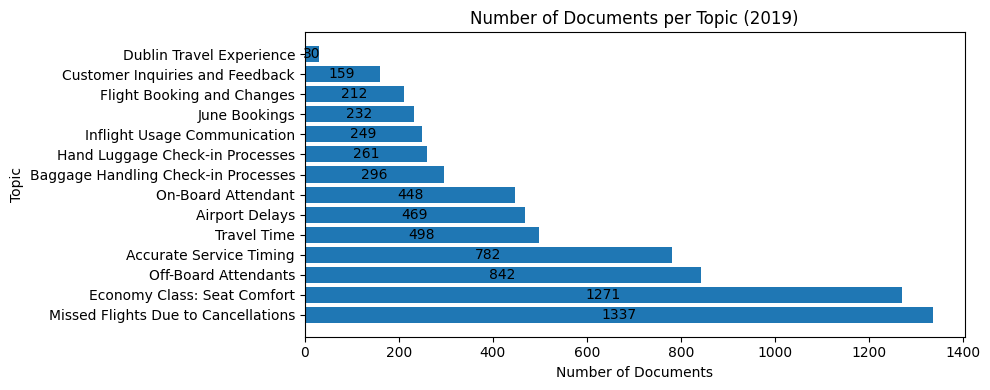

In [ ]:
# Count the occurrences of each topic in the 'Topic' column for 2019
topic_counts_2019 = df_2019['Topic'].value_counts()

# Create a bar chart to visualize the topics and the number of documents assigned to each topic
plt.figure(figsize=(10, 4))  # Adjust the figure size according to your preference
bars = plt.barh(topic_counts_2019.index, topic_counts_2019.values)
plt.ylabel('Topic')
plt.xlabel('Number of Documents')
plt.title('Number of Documents per Topic (2019)')

# Add counts of documents in the middle of the bars
for bar, count in zip(bars, topic_counts_2019.values):
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, str(count), ha='center', va='center')

plt.tight_layout()  # To prevent overlapping labels
plt.show()


Average Sentiment Score for Each Topic (2019):
Topic
Accurate Service Timing                0.556888
Airport Delays                        -0.362938
Baggage Handling Check-in Processes   -0.017100
Customer Inquiries and Feedback        0.084819
Dublin Travel Experience               0.150320
Economy Class: Seat Comfort            0.533507
Flight Booking and Changes            -0.162080
Hand Luggage Check-in Processes        0.359597
Inflight Usage Communication           0.125565
June Bookings                          0.221917
Missed Flights Due to Cancellations   -0.281379
Off-Board Attendants                   0.452441
On-Board Attendant                     0.172445
Travel Time                            0.193569
Name: sentiment_scores, dtype: float64


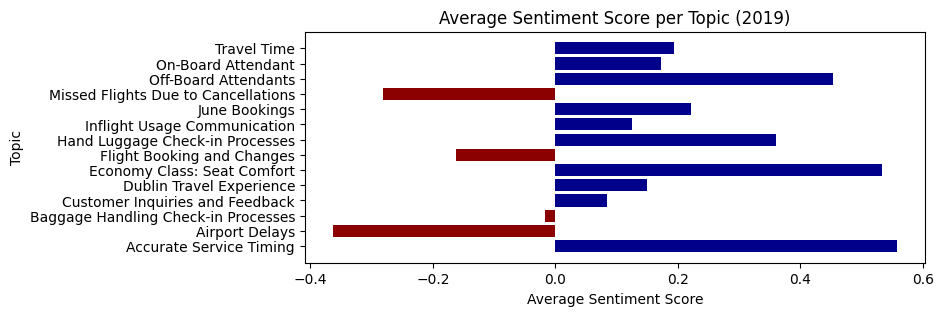

In [ ]:
# Group by 'Topic' and calculate the average sentiment score for each topic for 2019
topic_sentiment_2019 = df_2019.groupby('Topic')['sentiment_scores'].mean()

# Print the average sentiment score for each topic for 2019
print("Average Sentiment Score for Each Topic (2019):")
print(topic_sentiment_2019)

# Create a bar chart to visualize the average sentiment score for each topic for 2019
plt.figure(figsize=(8, 3))

# Define colors based on sentiment scores
colors = ['darkred' if score < 0 else 'darkblue' for score in topic_sentiment_2019.values]

plt.barh(topic_sentiment_2019.index, topic_sentiment_2019.values, color=colors)  # Use barh for horizontal bars
plt.xlabel('Average Sentiment Score')  # Swap x-axis and y-axis labels
plt.ylabel('Topic')  # Swap x-axis and y-axis labels
plt.title('Average Sentiment Score per Topic (2019)')

plt.show()


In [ ]:
# Assuming you have a DataFrame named df_2019 and a Series named topic_sentiment_2019
# containing average sentiment scores for each topic for 2019

# Create a dictionary from the topic_sentiment_2019 Series
topic_sentiment_2019_dict = topic_sentiment_2019.to_dict()

# Map the average sentiment scores to the 'Topic' column in the original DataFrame
df_2019['Topic_Sentiment_Score'] = df_2019['Topic'].map(topic_sentiment_2019_dict)

# Print the updated DataFrame
df_2019


<ipython-input-23-d6070d0e6177>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Topic_Sentiment_Score'] = df_2019['Topic'].map(topic_sentiment_2019_dict)


,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic,Topic_Sentiment_Score
33,2019,Airline Rating,board aircraft harding crew realize american a...,-0.9638,negative,Airport Delays,-0.362938
34,2019,Airline Rating,bad airline fly dallas begin airplane remain m...,-0.6249,negative,Missed Flights Due to Cancellations,-0.281379
35,2019,Airline Rating,plane wait gate clear dallassort north time de...,0.4588,positive,Missed Flights Due to Cancellations,-0.281379
36,2019,Airline Rating,bad flight seat small uncomfortable food poor ...,-0.7430,negative,Economy Class: Seat Comfort,0.533507
37,2019,Airline Rating,american airline change flight time end stuck ...,-0.2500,negative,Travel Time,0.193569
...,...,...,...,...,...,...,...
23217,2019,Trustpilot,travel clot american airline week miss flight ...,-0.3612,negative,Travel Time,0.193569
23218,2019,Trustpilot,service plane good spanish customer service ba...,0.1531,positive,On-Board Attendant,0.172445
23219,2019,Trustpilot,issue damage luggage online customer service d...,0.9576,positive,Travel Time,0.193569
23220,2019,Trustpilot,recently travel airline american airline surly...,0.9313,positive,Economy Class: Seat Comfort,0.533507


In [ ]:
# Function to label topics based on average sentiment score
def label_sentiment(score):
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"


# Apply the function to each topic in the DataFrame for 2019
df_2019['Topic_Sentiment'] = df_2019['Topic'].apply(lambda topic: label_sentiment(topic_sentiment_2019[topic]))


<ipython-input-24-61494a8b8725>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Topic_Sentiment'] = df_2019['Topic'].apply(lambda topic: label_sentiment(topic_sentiment_2019[topic]))


In [ ]:
# Print the DataFrame to verify the new column for 2019
df_2019

,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic,Topic_Sentiment_Score,Topic_Sentiment
33,2019,Airline Rating,board aircraft harding crew realize american a...,-0.9638,negative,Airport Delays,-0.362938,negative
34,2019,Airline Rating,bad airline fly dallas begin airplane remain m...,-0.6249,negative,Missed Flights Due to Cancellations,-0.281379,negative
35,2019,Airline Rating,plane wait gate clear dallassort north time de...,0.4588,positive,Missed Flights Due to Cancellations,-0.281379,negative
36,2019,Airline Rating,bad flight seat small uncomfortable food poor ...,-0.7430,negative,Economy Class: Seat Comfort,0.533507,positive
37,2019,Airline Rating,american airline change flight time end stuck ...,-0.2500,negative,Travel Time,0.193569,positive
...,...,...,...,...,...,...,...,...
23217,2019,Trustpilot,travel clot american airline week miss flight ...,-0.3612,negative,Travel Time,0.193569,positive
23218,2019,Trustpilot,service plane good spanish customer service ba...,0.1531,positive,On-Board Attendant,0.172445,positive
23219,2019,Trustpilot,issue damage luggage online customer service d...,0.9576,positive,Travel Time,0.193569,positive
23220,2019,Trustpilot,recently travel airline american airline surly...,0.9313,positive,Economy Class: Seat Comfort,0.533507,positive


###  perplexity 2019

In [ ]:
# Split data into train and test sets for 2019
train_df_2019, test_df_2019 = train_test_split(df_2019, test_size=0.2, random_state=42)

# Tokenize test documents for 2019
test_documents_2019 = [comment.split() for comment in test_df_2019["Review"]]
test_corpus_2019 = [vocab_2019.doc2bow(text) for text in test_documents_2019]

# Calculate perplexity on the test data for 2019
total_likelihood_2019 = 0.0
total_words_2019 = 0

for doc_bow in test_corpus_2019:
    doc_likelihood = 0.0
    doc_word_count = sum(cnt for _, cnt in doc_bow)

    for topic_id, word_count in lda_2019.get_document_topics(doc_bow):
        word_prob = lda_2019.get_topic_terms(topic_id, topn=None)
        topic_prob = sum(prob for _, prob in word_prob)
        doc_likelihood += word_count * topic_prob

    total_likelihood_2019 += doc_likelihood
    total_words_2019 += doc_word_count

perplexity_2019 = np.exp(-total_likelihood_2019 / total_words_2019)
print(f"Perplexity on Test Data (2019): {perplexity_2019}")

Perplexity on Test Data (2019): 0.9633840164669558


##2020

In [ ]:
## For 2020 ##

# Filter rows where the 'Year' column is equal to 2020
df_2020 = df[df['Year'] == 2020]

# Convert float values to strings
df_2020['Review'] = df_2020['Review'].astype(str)


<ipython-input-27-b05a7ca98e60>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Review'] = df_2020['Review'].astype(str)


In [ ]:
# Tokenize documents
documents_2020 = [comment.split() for comment in df_2020["Review"]]

# Create dictionary and corpus
vocab_2020 = corpora.Dictionary(documents_2020)
corpus_2020 = [vocab_2020.doc2bow(text) for text in documents_2020]


In [ ]:
# set hyperparameters for 2020
num_topics_2020 = 21 ### the optimum from coherence
alpha_2020 = 0.1  # Hyperparameter for document-topic distribution
eta_2020 = 0.01  # hyperparameter for topic-word distribution, determined automatically by Gensim

# Set the random seed
np.random.seed(42)

In [ ]:
# create LDA model with hyperparameters for 2020
lda_2020 = gensim.models.ldamodel.LdaModel(corpus=corpus_2020,
                                           id2word=vocab_2020,
                                           num_topics=num_topics_2020,
                                           alpha=alpha_2020,
                                           eta=eta_2020)

# print the top 10 words in each topic for 2020
pprint(lda_2020.show_topics(num_topics=num_topics_2020, num_words=10))

[(0,
  '0.036*"flight" + 0.032*"customer" + 0.028*"service" + 0.026*"airline" + '
  '0.013*"check" + 0.013*"fly" + 0.012*"american" + 0.010*"ticket" + '
  '0.009*"book" + 0.008*"need"'),
 (1,
  '0.060*"flight" + 0.020*"good" + 0.016*"seat" + 0.016*"time" + 0.014*"early" '
  '+ 0.013*"fly" + 0.013*"crew" + 0.013*"service" + 0.012*"plane" + '
  '0.011*"class"'),
 (2,
  '0.044*"flight" + 0.043*"airline" + 0.029*"american" + 0.018*"fly" + '
  '0.018*"service" + 0.016*"customer" + 0.014*"time" + 0.014*"good" + '
  '0.012*"plane" + 0.011*"bad"'),
 (3,
  '0.045*"flight" + 0.026*"airline" + 0.022*"american" + 0.021*"fly" + '
  '0.011*"plane" + 0.011*"seat" + 0.010*"sit" + 0.009*"time" + 0.007*"book" + '
  '0.007*"space"'),
 (4,
  '0.036*"airline" + 0.036*"seat" + 0.026*"flight" + 0.021*"plane" + '
  '0.018*"american" + 0.017*"fly" + 0.014*"service" + 0.014*"bad" + '
  '0.011*"customer" + 0.011*"tell"'),
 (5,
  '0.079*"flight" + 0.016*"good" + 0.016*"attendant" + 0.014*"time" + '
  '0.012*"airl

In [ ]:
# Calculate coherence score for 2020
coherence_model_2020 = CoherenceModel(model=lda_2020, texts=documents_2020, dictionary=vocab_2020, coherence='c_v')
coherence_score_2020 = coherence_model_2020.get_coherence()
print("Coherence Score for 2020:", coherence_score_2020)

Coherence Score for 2020: 0.3959995690246422


In [ ]:
# Function to get the topic with the highest probability in a document for 2020
def get_document_topic_2020(doc_bow):
    topics = lda_2020.get_document_topics(doc_bow, minimum_probability=0.0)
    topics_sorted = sorted(topics, key=lambda x: x[1], reverse=True)
    return topics_sorted[0][0]

# Create a new column 'Topic' in the DataFrame with the topic assigned to each document for 2020
df_2020['Topic'] = [get_document_topic_2020(doc_bow) for doc_bow in corpus_2020]

# Print the DataFrame with the 'Topic' column for 2020
df_2020.head()

<ipython-input-32-f87ca2074f15>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Topic'] = [get_document_topic_2020(doc_bow) for doc_bow in corpus_2020]


,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic
27,2020,Airline Rating,usa bad airline world fact professional light ...,-0.6461,negative,3
28,2020,Airline Rating,travel american time impress,0.5267,positive,9
29,2020,Airline Rating,think good option anna travel usa,0.4404,positive,1
30,2020,Airline Rating,terrible experience carryon bag meet guideline...,0.2023,positive,20
31,2020,Airline Rating,original flight delay connect flight coast hom...,-0.8020,negative,18


In [ ]:
# Assuming df_2020 is your DataFrame containing the 'Topic' column with numeric values

# Define a mapping between numeric values and corresponding topics for 2020
topic_mapping_2020 = {
    0: 'Ticket Check-in',
    1: 'Flight Seat Quality',
    2: 'On-Board Attendant',
    3: 'Flight Booking and Changes',
    4: 'In-flight Seat Comfort',
    5: 'Off-Board Attendants',
    6: 'Plane Ticket Services',
    7: 'Ticket Cancellations',
    8: 'Business Class Experience',
    9: 'Airport Services',
    10: 'In-flight Seating Time',
    11: 'Accurate Service Timing',
    12: 'Great In-flight Amenities',
    13: 'Travel Time',
    14: 'Flight Cancellation and Refund Processes',
    15: 'In-flight Food and Entertainment',
    16: 'Duration of Trip',
    17: 'Boarding Services',
    18: 'Service Modifications',
    19: 'Boarding Time',
    20: 'Baggage Handling Check-in Processes'
}

# Apply the mapping on the existing 'Topic' column for 2020
df_2020['Topic'] = df_2020['Topic'].replace(topic_mapping_2020)


# Print the DataFrame with the 'Topic' column renamed to topic names for 2020
df_2020.head()


<ipython-input-33-d6232be3bd3d>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Topic'] = df_2020['Topic'].replace(topic_mapping_2020)


,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic
27,2020,Airline Rating,usa bad airline world fact professional light ...,-0.6461,negative,Flight Booking and Changes
28,2020,Airline Rating,travel american time impress,0.5267,positive,Airport Services
29,2020,Airline Rating,think good option anna travel usa,0.4404,positive,Flight Seat Quality
30,2020,Airline Rating,terrible experience carryon bag meet guideline...,0.2023,positive,Baggage Handling Check-in Processes
31,2020,Airline Rating,original flight delay connect flight coast hom...,-0.8020,negative,Service Modifications


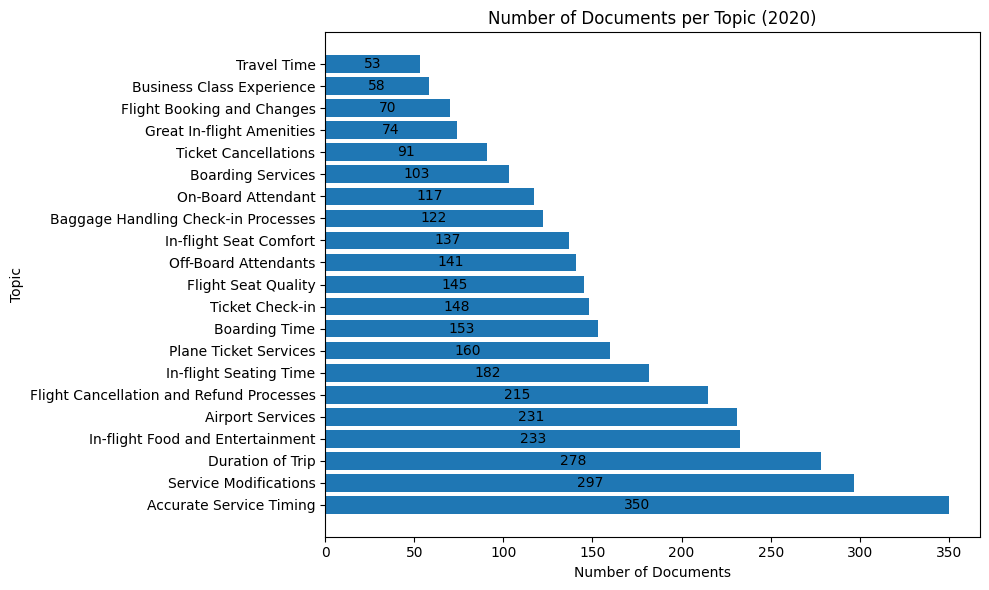

In [ ]:
# Count the occurrences of each topic in the 'Topic' column for 2020
topic_counts_2020 = df_2020['Topic'].value_counts()

# Create a bar chart to visualize the topics and the number of documents assigned to each topic for 2020
plt.figure(figsize=(10, 6))  # Adjust the figure size according to your preference
bars = plt.barh(topic_counts_2020.index, topic_counts_2020.values)
plt.ylabel('Topic')
plt.xlabel('Number of Documents')
plt.title('Number of Documents per Topic (2020)')

# Add counts of documents in the middle of the bars for 2020
for bar, count in zip(bars, topic_counts_2020.values):
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, str(count), ha='center', va='center')

plt.tight_layout()  # To prevent overlapping labels
plt.show()


Average Sentiment Score for Each Topic (2020):
Topic
Accurate Service Timing                     0.263480
Airport Services                           -0.049430
Baggage Handling Check-in Processes         0.072913
Boarding Services                           0.181686
Boarding Time                               0.241383
Business Class Experience                   0.204455
Duration of Trip                           -0.243485
Flight Booking and Changes                  0.193103
Flight Cancellation and Refund Processes    0.052524
Flight Seat Quality                         0.418436
Great In-flight Amenities                   0.566247
In-flight Food and Entertainment            0.521414
In-flight Seat Comfort                      0.162673
In-flight Seating Time                      0.256305
Off-Board Attendants                        0.463786
On-Board Attendant                         -0.001271
Plane Ticket Services                       0.101884
Service Modifications                      -0.

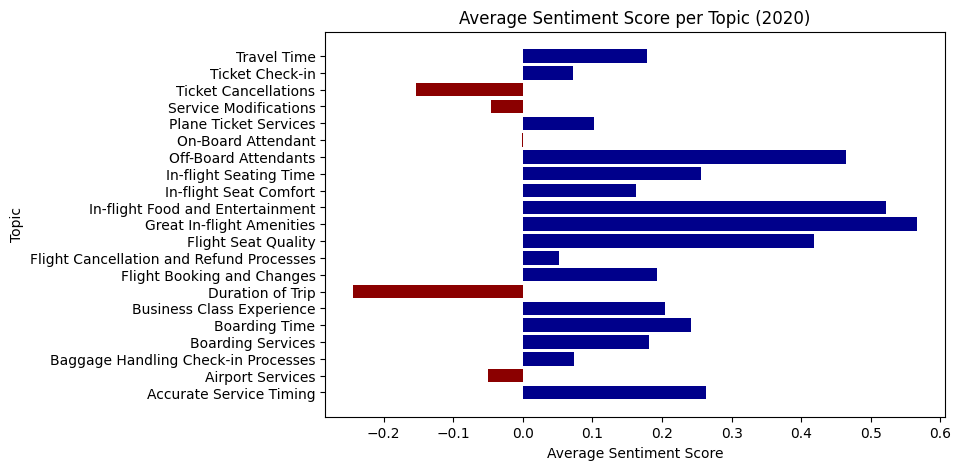

In [ ]:
# Group by 'Topic' and calculate the average sentiment score for each topic for 2020
topic_sentiment_2020 = df_2020.groupby('Topic')['sentiment_scores'].mean()

# Print the average sentiment score for each topic for 2020
print("Average Sentiment Score for Each Topic (2020):")
print(topic_sentiment_2020)

# Create a bar chart to visualize the average sentiment score for each topic for 2020
plt.figure(figsize=(8, 5))

# Define colors based on sentiment scores
colors = ['darkred' if score < 0 else 'darkblue' for score in topic_sentiment_2020.values]

plt.barh(topic_sentiment_2020.index, topic_sentiment_2020.values, color=colors)  # Use barh for horizontal bars
plt.xlabel('Average Sentiment Score')  # Swap x-axis and y-axis labels
plt.ylabel('Topic')  # Swap x-axis and y-axis labels
plt.title('Average Sentiment Score per Topic (2020)')

plt.show()

In [ ]:
# Create a dictionary from the topic_sentiment_2020 Series
topic_sentiment_2020_dict = topic_sentiment_2020.to_dict()

# Map the average sentiment scores to the 'Topic' column in the original DataFrame
df_2020['Topic_Sentiment_Score'] = df_2020['Topic'].map(topic_sentiment_2020_dict)

# Print the updated DataFrame
df_2020


<ipython-input-36-e7d2df621ddd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Topic_Sentiment_Score'] = df_2020['Topic'].map(topic_sentiment_2020_dict)


,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic,Topic_Sentiment_Score
27,2020,Airline Rating,usa bad airline world fact professional light ...,-0.6461,negative,Flight Booking and Changes,0.193103
28,2020,Airline Rating,travel american time impress,0.5267,positive,Airport Services,-0.049430
29,2020,Airline Rating,think good option anna travel usa,0.4404,positive,Flight Seat Quality,0.418436
30,2020,Airline Rating,terrible experience carryon bag meet guideline...,0.2023,positive,Baggage Handling Check-in Processes,0.072913
31,2020,Airline Rating,original flight delay connect flight coast hom...,-0.8020,negative,Service Modifications,-0.045325
...,...,...,...,...,...,...,...
23028,2020,Trustpilot,star economy class experience think review ang...,0.9559,positive,Ticket Check-in,0.071647
23029,2020,Trustpilot,worst airlinewaite long flight trash need refu...,-0.1531,negative,Flight Cancellation and Refund Processes,0.052524
23030,2020,Trustpilot,horrible flight thousand issue jfk cancel flig...,-0.8519,negative,Duration of Trip,-0.243485
23031,2020,Trustpilot,reach new high air travel miserable possible b...,-0.5719,negative,In-flight Seating Time,0.256305


In [ ]:
# Function to label topics based on average sentiment score
def label_sentiment(score):
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"


# Apply the function to each topic in the DataFrame for 2020
df_2020['Topic_Sentiment'] = df_2020['Topic'].apply(lambda topic: label_sentiment(topic_sentiment_2020[topic]))



<ipython-input-37-69585b1bb510>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Topic_Sentiment'] = df_2020['Topic'].apply(lambda topic: label_sentiment(topic_sentiment_2020[topic]))


In [ ]:
# Print the DataFrame to verify the new column for 2020
df_2020

,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic,Topic_Sentiment_Score,Topic_Sentiment
27,2020,Airline Rating,usa bad airline world fact professional light ...,-0.6461,negative,Flight Booking and Changes,0.193103,positive
28,2020,Airline Rating,travel american time impress,0.5267,positive,Airport Services,-0.049430,negative
29,2020,Airline Rating,think good option anna travel usa,0.4404,positive,Flight Seat Quality,0.418436,positive
30,2020,Airline Rating,terrible experience carryon bag meet guideline...,0.2023,positive,Baggage Handling Check-in Processes,0.072913,positive
31,2020,Airline Rating,original flight delay connect flight coast hom...,-0.8020,negative,Service Modifications,-0.045325,negative
...,...,...,...,...,...,...,...,...
23028,2020,Trustpilot,star economy class experience think review ang...,0.9559,positive,Ticket Check-in,0.071647,positive
23029,2020,Trustpilot,worst airlinewaite long flight trash need refu...,-0.1531,negative,Flight Cancellation and Refund Processes,0.052524,positive
23030,2020,Trustpilot,horrible flight thousand issue jfk cancel flig...,-0.8519,negative,Duration of Trip,-0.243485,negative
23031,2020,Trustpilot,reach new high air travel miserable possible b...,-0.5719,negative,In-flight Seating Time,0.256305,positive


### perplexity 2020

In [ ]:
# ... (Continuing from where you left off in your code)

# Split data into train and test sets for 2020
train_df_2020, test_df_2020 = train_test_split(df_2020, test_size=0.2, random_state=42)

# Tokenize test documents for 2020
test_documents_2020 = [comment.split() for comment in test_df_2020["Review"]]
test_corpus_2020 = [vocab_2020.doc2bow(text) for text in test_documents_2020]

# Calculate perplexity on the test data for 2020
total_likelihood_2020 = 0.0
total_words_2020 = 0

for doc_bow in test_corpus_2020:
    doc_likelihood = 0.0
    doc_word_count = sum(cnt for _, cnt in doc_bow)

    for topic_id, word_count in lda_2020.get_document_topics(doc_bow):
        word_prob = lda_2020.get_topic_terms(topic_id, topn=None)
        topic_prob = sum(prob for _, prob in word_prob)
        doc_likelihood += word_count * topic_prob

    total_likelihood_2020 += doc_likelihood
    total_words_2020 += doc_word_count

perplexity_2020 = np.exp(-total_likelihood_2020 / total_words_2020)
print(f"Perplexity on Test Data (2020): {perplexity_2020}")


Perplexity on Test Data (2020): 0.9662473696576787


## **2021**

In [ ]:
## For 2021 ##

# Filter rows where the 'Year' column is equal to 2021
df_2021 = df[df['Year'] == 2021]

# Convert float values to strings
df_2021['Review'] = df_2021['Review'].astype(str)

<ipython-input-40-7695302e6b3e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Review'] = df_2021['Review'].astype(str)


In [ ]:
# Tokenize documents
documents_2021 = [comment.split() for comment in df_2021["Review"]]

# Create dictionary and corpus
vocab_2021 = corpora.Dictionary(documents_2021)
corpus_2021 = [vocab_2021.doc2bow(text) for text in documents_2021]

In [ ]:
# set hyperparameters for 2021
num_topics_2021 = 12 ### the optimum from coherence
alpha_2021 = 0.1  # Hyperparameter for document-topic distribution
eta_2021 = 0.01  # hyperparameter for topic-word distribution, determined automatically by Gensim

# Set the random seed
np.random.seed(7)   #7,

In [ ]:
# create LDA model with hyperparameters for 2021
lda_2021 = gensim.models.ldamodel.LdaModel(corpus=corpus_2021,
                                           id2word=vocab_2021,
                                           num_topics=num_topics_2021,
                                           alpha=alpha_2021,
                                           eta=eta_2021)

# print the top 10 words in each topic for 2021
pprint(lda_2021.show_topics(num_topics=num_topics_2021, num_words=10))

[(0,
  '0.042*"airline" + 0.038*"flight" + 0.020*"american" + 0.020*"time" + '
  '0.017*"hour" + 0.011*"customer" + 0.011*"ticket" + 0.010*"delay" + '
  '0.010*"travel" + 0.009*"cancel"'),
 (1,
  '0.027*"flight" + 0.017*"airline" + 0.017*"seat" + 0.015*"american" + '
  '0.015*"hour" + 0.014*"wait" + 0.012*"good" + 0.011*"ticket" + '
  '0.011*"service" + 0.010*"plane"'),
 (2,
  '0.064*"flight" + 0.032*"plane" + 0.024*"hour" + 0.015*"seat" + '
  '0.015*"delay" + 0.014*"airline" + 0.013*"american" + 0.013*"time" + '
  '0.012*"day" + 0.011*"wait"'),
 (3,
  '0.067*"flight" + 0.027*"fly" + 0.021*"time" + 0.018*"airline" + '
  '0.017*"american" + 0.015*"delay" + 0.012*"airport" + 0.010*"hour" + '
  '0.010*"check" + 0.009*"change"'),
 (4,
  '0.036*"flight" + 0.029*"airline" + 0.028*"time" + 0.025*"service" + '
  '0.019*"american" + 0.017*"customer" + 0.014*"fly" + 0.012*"check" + '
  '0.010*"bag" + 0.010*"plane"'),
 (5,
  '0.067*"flight" + 0.028*"airline" + 0.020*"customer" + 0.019*"service" +

In [ ]:
# Calculate coherence score for 2021
coherence_model_2021 = CoherenceModel(model=lda_2021, texts=documents_2021, dictionary=vocab_2021, coherence='c_v')
coherence_score_2021 = coherence_model_2021.get_coherence()
print("Coherence Score for 2021:", coherence_score_2021)

Coherence Score for 2021: 0.39161142338975136


In [ ]:
# Function to get the topic with the highest probability in a document for 2021
def get_document_topic_2021(doc_bow):
    topics = lda_2021.get_document_topics(doc_bow, minimum_probability=0.0)
    topics_sorted = sorted(topics, key=lambda x: x[1], reverse=True)
    return topics_sorted[0][0]

# Create a new column 'Topic' in the DataFrame with the topic assigned to each document for 2021
df_2021['Topic'] = [get_document_topic_2021(doc_bow) for doc_bow in corpus_2021]

# Print the DataFrame with the 'Topic' column for 2021
df_2021.head()

<ipython-input-45-31044cb0ff7b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Topic'] = [get_document_topic_2021(doc_bow) for doc_bow in corpus_2021]


,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic
15,2021,Airline Rating,bad airline war month travel resume unfortunat...,-0.9360,negative,7
16,2021,Airline Rating,like american airline star airline quality mon...,0.9524,positive,10
17,2021,Airline Rating,horrible far bad airline consistently terrible...,-0.7717,negative,7
18,2021,Airline Rating,horrible operation american airline check carr...,0.8316,positive,8
19,2021,Airline Rating,flight month lock international travel chilean...,0.9309,positive,11


In [ ]:
# Assuming df_2021 is your DataFrame containing the 'Topic' column with numeric values

# Define a mapping between numeric values and corresponding topics for 2021
topic_mapping_2021 = {
    0: 'Ticket Check-in',
    1: 'Flight Seat Quality',
    2: 'Airline Service Queues',
    3: 'Flight Changes and Delays',
    4: 'Baggage Handling Check-in Processes',
    5: 'On-Board Attendant',
    6: 'Ticket Cancellations',
    7: 'Plane Ticket Services',
    8: 'Inflight Usage Communication',
    9: 'Booking Time',
    10: 'In-flight Seating Time',
    11: 'Flight Cancellations and Delays'
}

# Apply the mapping on the existing 'Topic' column for 2021
df_2021['Topic'] = df_2021['Topic'].replace(topic_mapping_2021)

# Print the DataFrame with the 'Topic' column renamed to topic names for 2021
df_2021.head()

<ipython-input-46-c2a2d84b0a3e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Topic'] = df_2021['Topic'].replace(topic_mapping_2021)


,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic
15,2021,Airline Rating,bad airline war month travel resume unfortunat...,-0.9360,negative,Plane Ticket Services
16,2021,Airline Rating,like american airline star airline quality mon...,0.9524,positive,In-flight Seating Time
17,2021,Airline Rating,horrible far bad airline consistently terrible...,-0.7717,negative,Plane Ticket Services
18,2021,Airline Rating,horrible operation american airline check carr...,0.8316,positive,Inflight Usage Communication
19,2021,Airline Rating,flight month lock international travel chilean...,0.9309,positive,Flight Cancellations and Delays


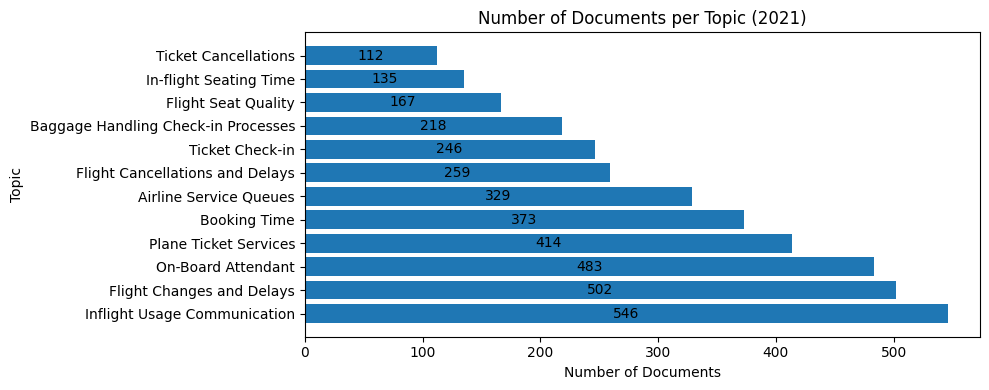

In [ ]:
# Count the occurrences of each topic in the 'Topic' column for 2021
topic_counts_2021 = df_2021['Topic'].value_counts()

# Create a bar chart to visualize the topics and the number of documents assigned to each topic
plt.figure(figsize=(10, 4))  # Adjust the figure size according to your preference
bars = plt.barh(topic_counts_2021.index, topic_counts_2021.values)
plt.ylabel('Topic')
plt.xlabel('Number of Documents')
plt.title('Number of Documents per Topic (2021)')

# Add counts of documents in the middle of the bars
for bar, count in zip(bars, topic_counts_2021.values):
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, str(count), ha='center', va='center')

plt.tight_layout()  # To prevent overlapping labels
plt.show()

Average Sentiment Score for Each Topic (2021):
Topic
Airline Service Queues                -0.242934
Baggage Handling Check-in Processes   -0.117760
Booking Time                          -0.151520
Flight Cancellations and Delays       -0.137388
Flight Changes and Delays             -0.114349
Flight Seat Quality                    0.177289
In-flight Seating Time                -0.039364
Inflight Usage Communication          -0.172929
On-Board Attendant                    -0.144496
Plane Ticket Services                 -0.019239
Ticket Cancellations                  -0.309063
Ticket Check-in                       -0.062416
Name: sentiment_scores, dtype: float64


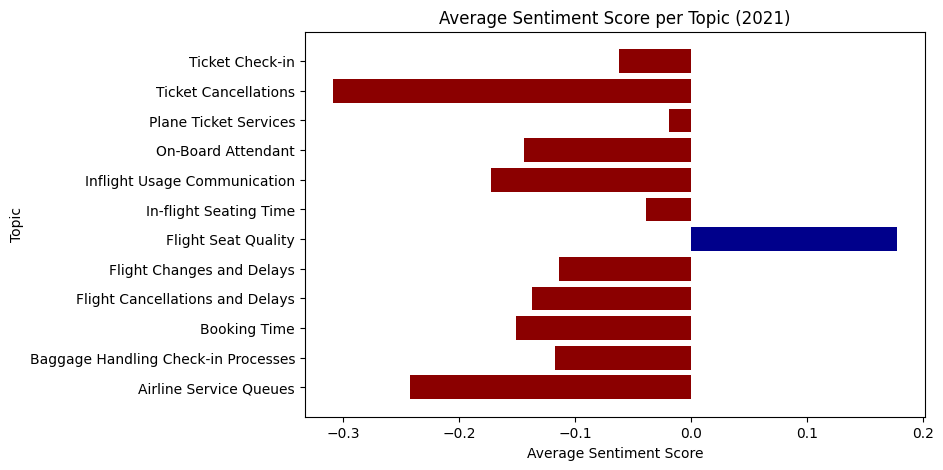

In [ ]:
# Group by 'Topic' and calculate the average sentiment score for each topic for 2021
topic_sentiment_2021 = df_2021.groupby('Topic')['sentiment_scores'].mean()

# Print the average sentiment score for each topic for 2021
print("Average Sentiment Score for Each Topic (2021):")
print(topic_sentiment_2021)

# Create a bar chart to visualize the average sentiment score for each topic for 2021
plt.figure(figsize=(8, 5))

# Define colors based on sentiment scores
colors = ['darkred' if score < 0 else 'darkblue' for score in topic_sentiment_2021.values]

plt.barh(topic_sentiment_2021.index, topic_sentiment_2021.values, color=colors)  # Use barh for horizontal bars
plt.xlabel('Average Sentiment Score')  # Swap x-axis and y-axis labels
plt.ylabel('Topic')  # Swap x-axis and y-axis labels
plt.title('Average Sentiment Score per Topic (2021)')

plt.show()

In [ ]:
# Create a dictionary from the topic_sentiment_2021 Series
topic_sentiment_2021_dict = topic_sentiment_2021.to_dict()

# Map the average sentiment scores to the 'Topic' column in the original DataFrame
df_2021['Topic_Sentiment_Score'] = df_2021['Topic'].map(topic_sentiment_2021_dict)

# Print the updated DataFrame
df_2021


<ipython-input-49-4b45aea1bbc9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Topic_Sentiment_Score'] = df_2021['Topic'].map(topic_sentiment_2021_dict)


,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic,Topic_Sentiment_Score
15,2021,Airline Rating,bad airline war month travel resume unfortunat...,-0.9360,negative,Plane Ticket Services,-0.019239
16,2021,Airline Rating,like american airline star airline quality mon...,0.9524,positive,In-flight Seating Time,-0.039364
17,2021,Airline Rating,horrible far bad airline consistently terrible...,-0.7717,negative,Plane Ticket Services,-0.019239
18,2021,Airline Rating,horrible operation american airline check carr...,0.8316,positive,Inflight Usage Communication,-0.172929
19,2021,Airline Rating,flight month lock international travel chilean...,0.9309,positive,Flight Cancellations and Delays,-0.137388
...,...,...,...,...,...,...,...
22841,2021,Trustpilot,select start understaffed airport sioux wall p...,0.5106,positive,Flight Changes and Delays,-0.114349
22842,2021,Trustpilot,depart flight change hour ask refund reject we...,0.9468,positive,Booking Time,-0.151520
22843,2021,Trustpilot,fly recently impressed measure amicable staff,0.4767,positive,Plane Ticket Services,-0.019239
22844,2021,Trustpilot,fly flight january advertise flight clean pass...,0.9081,positive,Plane Ticket Services,-0.019239


In [ ]:
# Function to label topics based on average sentiment score
def label_sentiment(score):
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

# Apply the function to each topic in the DataFrame for 2021
df_2021['Topic_Sentiment'] = df_2021['Topic'].apply(lambda topic: label_sentiment(topic_sentiment_2021[topic]))



<ipython-input-50-1a5d31f667e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Topic_Sentiment'] = df_2021['Topic'].apply(lambda topic: label_sentiment(topic_sentiment_2021[topic]))


In [ ]:
# Print the DataFrame to verify the new column for 2021
df_2021

,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic,Topic_Sentiment_Score,Topic_Sentiment
15,2021,Airline Rating,bad airline war month travel resume unfortunat...,-0.9360,negative,Plane Ticket Services,-0.019239,negative
16,2021,Airline Rating,like american airline star airline quality mon...,0.9524,positive,In-flight Seating Time,-0.039364,negative
17,2021,Airline Rating,horrible far bad airline consistently terrible...,-0.7717,negative,Plane Ticket Services,-0.019239,negative
18,2021,Airline Rating,horrible operation american airline check carr...,0.8316,positive,Inflight Usage Communication,-0.172929,negative
19,2021,Airline Rating,flight month lock international travel chilean...,0.9309,positive,Flight Cancellations and Delays,-0.137388,negative
...,...,...,...,...,...,...,...,...
22841,2021,Trustpilot,select start understaffed airport sioux wall p...,0.5106,positive,Flight Changes and Delays,-0.114349,negative
22842,2021,Trustpilot,depart flight change hour ask refund reject we...,0.9468,positive,Booking Time,-0.151520,negative
22843,2021,Trustpilot,fly recently impressed measure amicable staff,0.4767,positive,Plane Ticket Services,-0.019239,negative
22844,2021,Trustpilot,fly flight january advertise flight clean pass...,0.9081,positive,Plane Ticket Services,-0.019239,negative


### perplexity 2021

In [ ]:
# Split data into train and test sets for 2021
train_df_2021, test_df_2021 = train_test_split(df_2021, test_size=0.2, random_state=42)

# Tokenize test documents for 2021
test_documents_2021 = [comment.split() for comment in test_df_2021["Review"]]
test_corpus_2021 = [vocab_2021.doc2bow(text) for text in test_documents_2021]

# Calculate perplexity on the test data for 2021
total_likelihood_2021 = 0.0
total_words_2021 = 0

for doc_bow in test_corpus_2021:
    doc_likelihood = 0.0
    doc_word_count = sum(cnt for _, cnt in doc_bow)

    for topic_id, word_count in lda_2021.get_document_topics(doc_bow):
        word_prob = lda_2021.get_topic_terms(topic_id, topn=None)
        topic_prob = sum(prob for _, prob in word_prob)
        doc_likelihood += word_count * topic_prob

    total_likelihood_2021 += doc_likelihood
    total_words_2021 += doc_word_count

perplexity_2021 = np.exp(-total_likelihood_2021 / total_words_2021)
print(f"Perplexity on Test Data (2021): {perplexity_2021}")


Perplexity on Test Data (2021): 0.9694442490233062


## **2022**

In [ ]:
## For 2022 ##

# Filter rows where the 'Year' column is equal to 2022
df_2022 = df[df['Year'] == 2022]

# Convert float values to strings
df_2022['Review'] = df_2022['Review'].astype(str)


<ipython-input-53-a30cc8e8873e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Review'] = df_2022['Review'].astype(str)


In [ ]:
# Tokenize documents
documents_2022 = [comment.split() for comment in df_2022["Review"]]

# Create dictionary and corpus
vocab_2022 = corpora.Dictionary(documents_2022)
corpus_2022 = [vocab_2022.doc2bow(text) for text in documents_2022]

# set hyperparameters for 2022
num_topics_2022 = 15 ### the optimum from coherence
alpha_2022 = 0.1  # Hyperparameter for document-topic distribution
eta_2022 = 0.01  # hyperparameter for topic-word distribution, determined automatically by Gensim

# Set the random seed
np.random.seed(77)   #77

In [ ]:
# create LDA model with hyperparameters for 2022
lda_2022 = gensim.models.ldamodel.LdaModel(corpus=corpus_2022,
                                           id2word=vocab_2022,
                                           num_topics=num_topics_2022,
                                           alpha=alpha_2022,
                                           eta=eta_2022)

# print the top 10 words in each topic for 2022
pprint(lda_2022.show_topics(num_topics=num_topics_2022, num_words=10))


[(0,
  '0.051*"bag" + 0.030*"check" + 0.026*"flight" + 0.018*"airline" + '
  '0.015*"american" + 0.011*"pay" + 0.010*"baggage" + 0.010*"tell" + '
  '0.010*"travel" + 0.009*"airport"'),
 (1,
  '0.032*"service" + 0.028*"flight" + 0.025*"customer" + 0.023*"airline" + '
  '0.018*"american" + 0.017*"time" + 0.015*"fly" + 0.014*"bad" + 0.012*"hour" '
  '+ 0.010*"delay"'),
 (2,
  '0.040*"flight" + 0.019*"airline" + 0.019*"american" + 0.018*"service" + '
  '0.017*"customer" + 0.015*"tell" + 0.013*"hour" + 0.012*"cancel" + '
  '0.012*"day" + 0.009*"book"'),
 (3,
  '0.071*"flight" + 0.024*"time" + 0.022*"airline" + 0.017*"hour" + '
  '0.014*"use" + 0.013*"fly" + 0.013*"day" + 0.013*"delay" + 0.013*"american" '
  '+ 0.012*"trip"'),
 (4,
  '0.044*"flight" + 0.029*"plane" + 0.019*"hour" + 0.017*"fly" + 0.017*"gate" '
  '+ 0.013*"time" + 0.012*"tell" + 0.012*"delay" + 0.009*"day" + 0.009*"seat"'),
 (5,
  '0.059*"flight" + 0.018*"airline" + 0.018*"american" + 0.017*"hour" + '
  '0.013*"airport" + 0.0

In [ ]:
# Calculate coherence score for 2022
coherence_model_2022 = CoherenceModel(model=lda_2022, texts=documents_2022, dictionary=vocab_2022, coherence='c_v')
coherence_score_2022 = coherence_model_2022.get_coherence()
print("Coherence Score for 2022:", coherence_score_2022)

Coherence Score for 2022: 0.3916920473957637


In [ ]:
# Function to get the topic with the highest probability in a document for 2022
def get_document_topic_2022(doc_bow):
    topics = lda_2022.get_document_topics(doc_bow, minimum_probability=0.0)
    topics_sorted = sorted(topics, key=lambda x: x[1], reverse=True)
    return topics_sorted[0][0]

# Create a new column 'Topic' in the DataFrame with the topic assigned to each document for 2022
df_2022['Topic'] = [get_document_topic_2022(doc_bow) for doc_bow in corpus_2022]

# Print the DataFrame with the 'Topic' column for 2022
df_2022.head()

<ipython-input-57-5fbb6ee36b63>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Topic'] = [get_document_topic_2022(doc_bow) for doc_bow in corpus_2022]


,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic
0,2022,Airline Rating,try fly gjt yesterday afternoon fly decade iss...,0.7340,positive,9
1,2022,Airline Rating,rude woman desk mad ask check luggage early kn...,-0.9806,negative,5
2,2022,Airline Rating,normal mile year think ofd remount experience ...,0.9169,positive,13
3,2022,Airline Rating,american airline literally ruin trip good angr...,-0.8658,negative,10
4,2022,Airline Rating,horse airline ont recommend travel american ai...,0.1280,positive,9


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already created the 'Topic' column in df_2022 using the get_document_topic_2022 function
# Let's create a dictionary to map topic numbers to their corresponding names
topic_names = {
    0: 'Baggage Handling Check-in Processes',
    1: 'On-Board Attendant',
    2: 'Booking Information',
    3: 'Plane Take-off Delays',
    4: 'Inflight Usage Communication',
    5: 'Airport Services',
    6: 'Cancelation Services',
    7: 'Travel Time',
    8: 'Impact of Service Delays',
    9: 'Ticket Cancellations',
    10: 'Booking Time',
    11: 'Flight Cancellations and Delays',
    12: 'In-flight Seat Comfort',
    13: 'Airline Service Queues',
    14: 'Baggage Handling Delays'
}

# Now, replace the topic numbers with their corresponding names in the 'Topic' column
df_2022['Topic'] = df_2022['Topic'].map(topic_names)

# Print the DataFrame to verify the changes
df_2022

<ipython-input-58-1d83749c9ca4>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Topic'] = df_2022['Topic'].map(topic_names)


,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic
0,2022,Airline Rating,try fly gjt yesterday afternoon fly decade iss...,0.7340,positive,Ticket Cancellations
1,2022,Airline Rating,rude woman desk mad ask check luggage early kn...,-0.9806,negative,Airport Services
2,2022,Airline Rating,normal mile year think ofd remount experience ...,0.9169,positive,Airline Service Queues
3,2022,Airline Rating,american airline literally ruin trip good angr...,-0.8658,negative,Booking Time
4,2022,Airline Rating,horse airline ont recommend travel american ai...,0.1280,positive,Ticket Cancellations
...,...,...,...,...,...,...
22548,2022,Trustpilot,cabin baggage little big charge horrible,-0.5000,negative,Baggage Handling Check-in Processes
22549,2022,Trustpilot,wait hour suppose minute oncoming idiotic syst...,0.4588,positive,In-flight Seat Comfort
22550,2022,Trustpilot,travel use american airline sub prime employee...,-0.6486,negative,Booking Information
22551,2022,Trustpilot,bad experience life wait hour contact customer...,-0.5423,negative,Booking Information


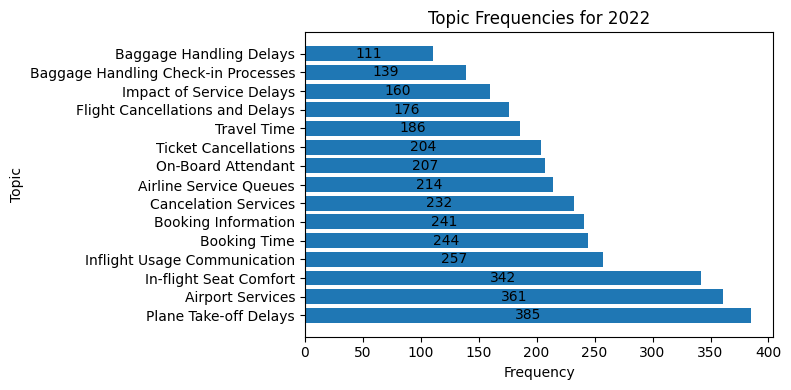

In [ ]:
# Count the occurrences of each topic
topic_counts = df_2022['Topic'].value_counts()

# Create a horizontal bar plot
plt.figure(figsize=(8, 4))
bars = plt.barh(topic_counts.index, topic_counts.values)
plt.xlabel('Frequency')
plt.ylabel('Topic')
plt.title('Topic Frequencies for 2022')

# Display the frequencies in the middle of the bars
for bar, frequency in zip(bars, topic_counts.values):
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, str(frequency),
             ha='center', va='center', color='black')

plt.tight_layout()

# Display the plot
plt.show()


Average Sentiment Score for Each Topic (2022):
Topic
Airline Service Queues                 0.121467
Airport Services                      -0.228616
Baggage Handling Check-in Processes   -0.004426
Baggage Handling Delays               -0.524882
Booking Information                   -0.193834
Booking Time                          -0.150366
Cancelation Services                  -0.329304
Flight Cancellations and Delays       -0.308353
Impact of Service Delays               0.032619
In-flight Seat Comfort                -0.140947
Inflight Usage Communication          -0.188860
On-Board Attendant                    -0.085003
Plane Take-off Delays                 -0.245725
Ticket Cancellations                   0.057985
Travel Time                            0.156147
Name: sentiment_scores, dtype: float64


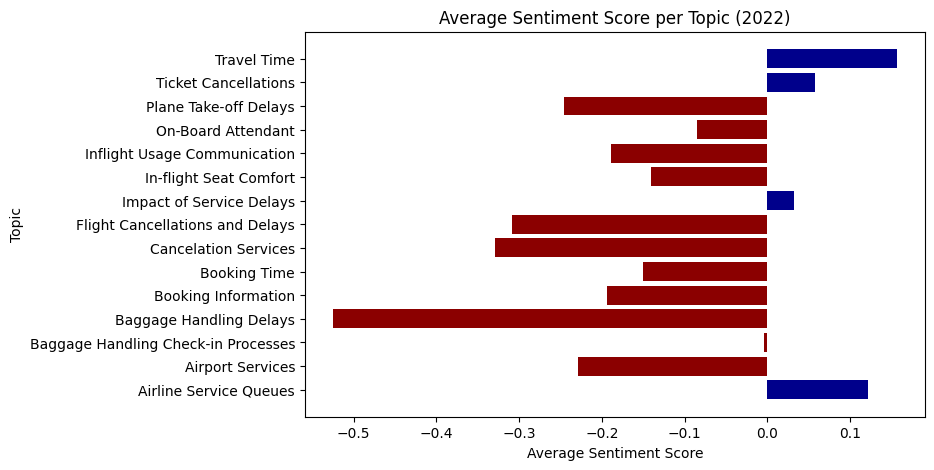

In [ ]:
# Group by 'Topic' and calculate the average sentiment score for each topic for 2022
topic_sentiment_2022 = df_2022.groupby('Topic')['sentiment_scores'].mean()

# Print the average sentiment score for each topic for 2022
print("Average Sentiment Score for Each Topic (2022):")
print(topic_sentiment_2022)

# Create a bar chart to visualize the average sentiment score for each topic for 2022
plt.figure(figsize=(8, 5))

# Define colors based on sentiment scores
colors = ['darkred' if score < 0 else 'darkblue' for score in topic_sentiment_2022.values]

plt.barh(topic_sentiment_2022.index, topic_sentiment_2022.values, color=colors)  # Use barh for horizontal bars
plt.xlabel('Average Sentiment Score')  # Swap x-axis and y-axis labels
plt.ylabel('Topic')  # Swap x-axis and y-axis labels
plt.title('Average Sentiment Score per Topic (2022)')

plt.show()

In [ ]:
# Create a dictionary from the topic_sentiment_2022 Series
topic_sentiment_2022_dict = topic_sentiment_2022.to_dict()

# Map the average sentiment scores to the 'Topic' column in the original DataFrame
df_2022['Topic_Sentiment_Score'] = df_2022['Topic'].map(topic_sentiment_2022_dict)

# Print the updated DataFrame
df_2022


<ipython-input-61-a8c4dd5ad5d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Topic_Sentiment_Score'] = df_2022['Topic'].map(topic_sentiment_2022_dict)


,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic,Topic_Sentiment_Score
0,2022,Airline Rating,try fly gjt yesterday afternoon fly decade iss...,0.7340,positive,Ticket Cancellations,0.057985
1,2022,Airline Rating,rude woman desk mad ask check luggage early kn...,-0.9806,negative,Airport Services,-0.228616
2,2022,Airline Rating,normal mile year think ofd remount experience ...,0.9169,positive,Airline Service Queues,0.121467
3,2022,Airline Rating,american airline literally ruin trip good angr...,-0.8658,negative,Booking Time,-0.150366
4,2022,Airline Rating,horse airline ont recommend travel american ai...,0.1280,positive,Ticket Cancellations,0.057985
...,...,...,...,...,...,...,...
22548,2022,Trustpilot,cabin baggage little big charge horrible,-0.5000,negative,Baggage Handling Check-in Processes,-0.004426
22549,2022,Trustpilot,wait hour suppose minute oncoming idiotic syst...,0.4588,positive,In-flight Seat Comfort,-0.140947
22550,2022,Trustpilot,travel use american airline sub prime employee...,-0.6486,negative,Booking Information,-0.193834
22551,2022,Trustpilot,bad experience life wait hour contact customer...,-0.5423,negative,Booking Information,-0.193834


In [ ]:
# Function to label topics based on average sentiment score
def label_sentiment(score):
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"


# Apply the function to each topic in the DataFrame for 2022
df_2022['Topic_Sentiment'] = df_2022['Topic'].apply(lambda topic: label_sentiment(topic_sentiment_2022[topic]))

df_2022

<ipython-input-62-c0066135f564>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Topic_Sentiment'] = df_2022['Topic'].apply(lambda topic: label_sentiment(topic_sentiment_2022[topic]))


,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic,Topic_Sentiment_Score,Topic_Sentiment
0,2022,Airline Rating,try fly gjt yesterday afternoon fly decade iss...,0.7340,positive,Ticket Cancellations,0.057985,positive
1,2022,Airline Rating,rude woman desk mad ask check luggage early kn...,-0.9806,negative,Airport Services,-0.228616,negative
2,2022,Airline Rating,normal mile year think ofd remount experience ...,0.9169,positive,Airline Service Queues,0.121467,positive
3,2022,Airline Rating,american airline literally ruin trip good angr...,-0.8658,negative,Booking Time,-0.150366,negative
4,2022,Airline Rating,horse airline ont recommend travel american ai...,0.1280,positive,Ticket Cancellations,0.057985,positive
...,...,...,...,...,...,...,...,...
22548,2022,Trustpilot,cabin baggage little big charge horrible,-0.5000,negative,Baggage Handling Check-in Processes,-0.004426,negative
22549,2022,Trustpilot,wait hour suppose minute oncoming idiotic syst...,0.4588,positive,In-flight Seat Comfort,-0.140947,negative
22550,2022,Trustpilot,travel use american airline sub prime employee...,-0.6486,negative,Booking Information,-0.193834,negative
22551,2022,Trustpilot,bad experience life wait hour contact customer...,-0.5423,negative,Booking Information,-0.193834,negative


### perlexity 2022

In [ ]:
# Split data into train and test sets for 2022
train_df_2022, test_df_2022 = train_test_split(df_2022, test_size=0.2, random_state=42)

# Tokenize test documents for 2022
test_documents_2022 = [comment.split() for comment in test_df_2022["Review"]]
test_corpus_2022 = [vocab_2022.doc2bow(text) for text in test_documents_2022]

# Calculate perplexity on the test data for 2022
total_likelihood_2022 = 0.0
total_words_2022 = 0

for doc_bow in test_corpus_2022:
    doc_likelihood = 0.0
    doc_word_count = sum(cnt for _, cnt in doc_bow)

    for topic_id, word_count in lda_2022.get_document_topics(doc_bow):
        word_prob = lda_2022.get_topic_terms(topic_id, topn=None)
        topic_prob = sum(prob for _, prob in word_prob)
        doc_likelihood += word_count * topic_prob

    total_likelihood_2022 += doc_likelihood
    total_words_2022 += doc_word_count

perplexity_2022 = np.exp(-total_likelihood_2022 / total_words_2022)
print(f"Perplexity on Test Data (2022): {perplexity_2022}")


Perplexity on Test Data (2022): 0.9713545250939568


## **Merge all 5 years into one**

In [ ]:
import pandas as pd

# Create a list of all the DataFrames
dataframes = [df_2018, df_2019, df_2020, df_2021, df_2022]

# Concatenate the DataFrames along the rows
merged_df = pd.concat(dataframes, ignore_index=True)

merged_df

,Year,Data_Source,Review,sentiment_scores,sentiment_label,Topic,Topic_Sentiment_Score,Topic_Sentiment
0,2018,Airline Rating,bwi airport diam leave class flight rep initia...,-0.9246,negative,Off-Board Attendants,-0.032151,negative
1,2018,Airline Rating,review submit american airline facebook page b...,-0.9190,negative,Impact Of Service Delays,0.022664,positive
2,2018,Airline Rating,suppose direct flight today phl bna right thin...,-0.9648,negative,Plane Take-off Delays,-0.321260,negative
3,2018,Airline Rating,fly piece trash airline leave strange day hurr...,-0.9623,negative,Plane Take-off Delays,-0.321260,negative
4,2018,Airline Rating,bad experience american airline cancel vacatio...,-0.9442,negative,Impact Of Service Delays,0.022664,positive
...,...,...,...,...,...,...,...,...
23294,2022,Trustpilot,cabin baggage little big charge horrible,-0.5000,negative,Baggage Handling Check-in Processes,-0.004426,negative
23295,2022,Trustpilot,wait hour suppose minute oncoming idiotic syst...,0.4588,positive,In-flight Seat Comfort,-0.140947,negative
23296,2022,Trustpilot,travel use american airline sub prime employee...,-0.6486,negative,Booking Information,-0.193834,negative
23297,2022,Trustpilot,bad experience life wait hour contact customer...,-0.5423,negative,Booking Information,-0.193834,negative


In [ ]:
merged_df.to_csv("merged_data_after_topic_sentiment.csv", index=False)